<a href="https://colab.research.google.com/github/Nadline/Nadline-Virgita/blob/main/TUBES_ML_CLUSTERING_K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Formulasi Masalah**

Dalam dunia bisnis, memahami perilaku konsumen merupakan hal yang sangat penting untuk mengembangkan strategi pemasaran yang tepat. Salah satu metode yang digunakan untuk memahami perilaku pelanggan adalah dengan segmentasi pelanggan berdasarkan karakteristik tertentu, seperti pendapatan dan pola pengeluaran.

Permasalahan utama yang ingin diselesaikan dalam tugas ini adalah:

*Bagaimana mengelompokkan pelanggan ke dalam beberapa segmen homogen berdasarkan tingkat pendapatan dan skor pengeluaran mereka, sehingga perusahaan dapat memahami perilaku tiap kelompok dan menyusun strategi pemasaran yang lebih efektif?*

Dengan menggunakan metode clustering, khususnya algoritma K-Means, tugas ini bertujuan untuk:

Menemukan pola pengelompokan alami (natural grouping) dalam data pelanggan.

Mengidentifikasi kelompok pelanggan potensial berdasarkan variabel seperti Annual Income (Pendapatan Tahunan) dan Spending Score (Skor Pengeluaran).

Membantu manajer pemasaran dalam mengambil keputusan yang berbasis data (data-driven decisions).



In [ ]:
!pip install kagglehub

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Mall_Customers.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df

<ipython-input-4-4231573293>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **2. Eksplorasi dan Persiapan Data (termasuk data splitting)**

Pada tahap ini dilakukan eksplorasi dan persiapan data awal.

In [ ]:
df.isnull().sum(), df.describe(), df.duplicated().sum()

(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000,
 np.int64(0))

Tahap diatas dilakukan pengecekan data kosong, data duplikat, dan ringkasan statistik untuk memastikan data bersih dan siap digunakan dalam pemodelan clustering.


In [ ]:
# Encoding Gender: Male -> 1, Female -> 2
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 2)


Pada tahap ini, data dikonversi agar siap digunakan untuk clustering. Kolom Gender diubah dari teks menjadi angka (Male = 1, Female = 2).

In [ ]:
print(df.columns)

# Pastikan tidak ada label atau kolom non-numerik yang ikut di-cluster
df = df.drop(columns=['CustomerID'], errors='ignore')

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


Kolom CustomerID dihapus karena tidak relevan untuk analisis.

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
195,2,35,120,79
196,2,45,126,28
197,1,32,126,74
198,1,32,137,18


Maka keluar output yang akan diinginkan dimana gender telah diganti dan kolom CustomerID telah dihapus

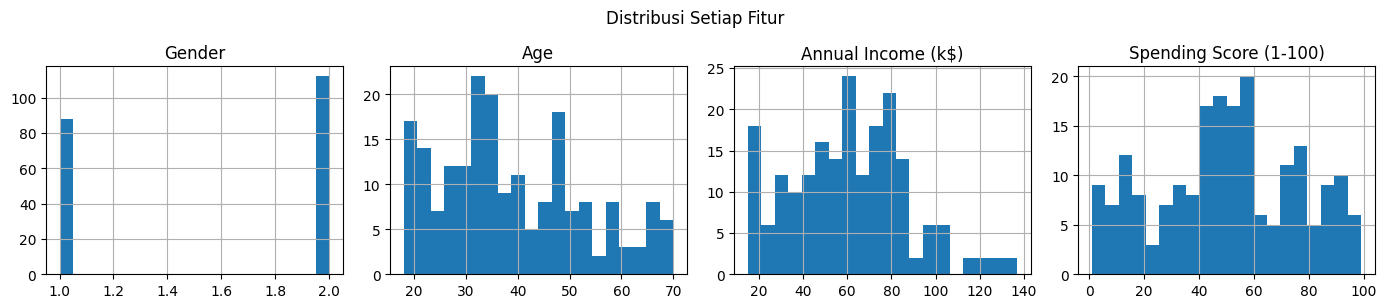

In [ ]:
import matplotlib.pyplot as plt

# Histogram tiap kolom
df.hist(bins=20, figsize=(14, 10), layout=(4, 4))
plt.tight_layout()
plt.suptitle("Distribusi Setiap Fitur", y=1.02)
plt.show()


Pada tahap ini dilakukan visualisasi data menggunakan histogram untuk melihat distribusi setiap fitur. Histogram menunjukkan sebaran jumlah data pada kolom Gender, Usia, Pendapatan Tahunan, dan Skor Belanja. Distribusi Gender terlihat cukup seimbang antara pria dan wanita. Usia pelanggan tersebar luas dengan dominasi pada rentang usia 20–40 tahun. Pendapatan tahunan menunjukkan pola yang bervariasi dengan beberapa puncak, menandakan keberagaman kelas ekonomi. Sementara itu, skor belanja juga tampak menyebar merata dengan kecenderungan pada beberapa kelompok nilai, yang dapat menjadi indikasi adanya pola klaster dalam perilaku konsumen.


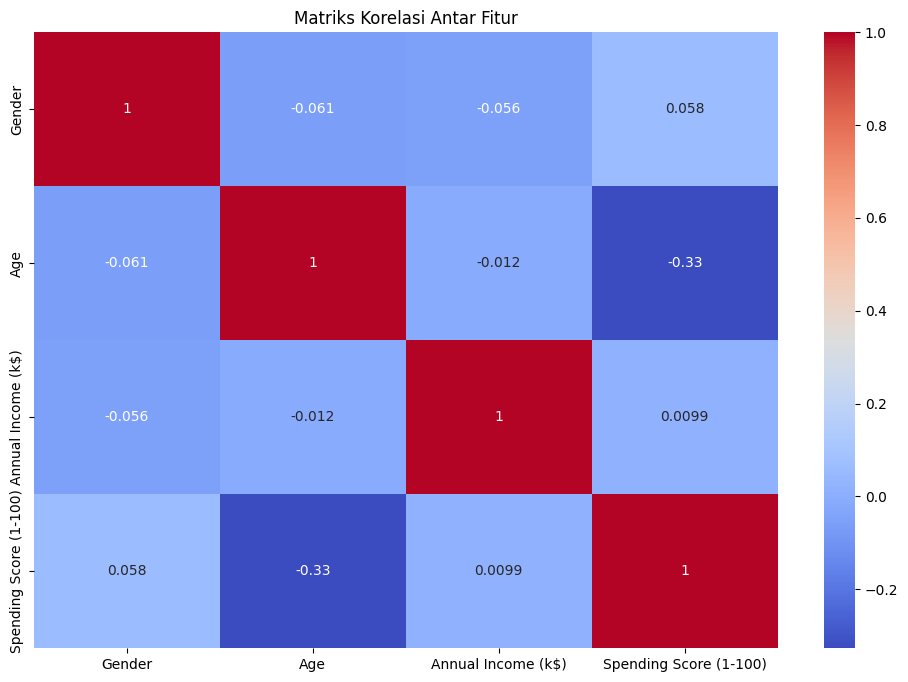

In [ ]:
import seaborn as sns

# Heatmap korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Antar Fitur")
plt.show()


Visualisasi ini menunjukkan *heatmap* matriks korelasi antar fitur dalam dataset menggunakan library Seaborn. Tujuannya adalah untuk mengidentifikasi hubungan linear antar variabel numerik, seperti Gender, Age, Annual Income, dan Spending Score. Dari hasil yang ditampilkan, terlihat bahwa tidak ada korelasi yang kuat antar fitur (nilai korelasinya mendekati nol), yang berarti setiap fitur memberikan informasi unik dan tidak redundan. Ini penting untuk analisis clustering, karena fitur yang tidak saling berkorelasi bisa membantu model membedakan kelompok dengan lebih akurat.

In [ ]:
# Ambil hanya 2 fitur dari DataFrame
data = df[["Annual Income (k$)", "Spending Score (1-100)"]]

data_scaled = []
for col in data.columns:
    col_vals = data[col].values
    mean = sum(col_vals) / len(col_vals)
    std = (sum((x - mean) ** 2 for x in col_vals) / len(col_vals)) ** 0.5
    data_scaled.append([(x - mean) / std for x in col_vals])

# Gabungkan jadi list of tuples (x1, x2)
data_list = list(zip(data_scaled[0], data_scaled[1]))


Potongan kode tersebut melakukan standardisasi terhadap dua fitur, yaitu *Annual Income (k\$)* dan *Spending Score (1-100)*. Standardisasi dilakukan dengan cara menghitung rata-rata dan standar deviasi masing-masing fitur, lalu mengubah setiap nilai menjadi bentuk z-score: $(x - \text{mean}) / \text{std}$. Hasilnya dimasukkan ke dalam `data_scaled`, kemudian digabungkan menjadi list of tuples `data_list` yang berisi pasangan nilai terstandardisasi dari kedua fitur tersebut, sehingga siap digunakan untuk proses clustering seperti K-Means.

# **3. Pemodelan Secara Manual (K-MEANS)**

In [ ]:
def euclidean_distance(x, y):
    total = 0
    for i in range(len(x)):
        total += (x[i] - y[i]) ** 2
    return total ** 0.5

In [ ]:
# ============================
# 6. K-Means Manual
# ============================

def kmeans_manual(data, k, max_iter=100):
    centroids = [data[i] for i in range(k)]
    for iteration in range(max_iter):
        clusters = [[] for _ in range(k)]
        for row in data:
            distances = [euclidean_distance(row, c) for c in centroids]
            cluster_idx = distances.index(min(distances))
            clusters[cluster_idx].append(row)

        new_centroids = []
        for cluster in clusters:
            if len(cluster) == 0:
                new_centroids.append([0]*len(data[0]))
            else:
                centroid = []
                for i in range(len(data[0])):
                    nilai_rata = sum([row[i] for row in cluster]) / len(cluster)
                    centroid.append(nilai_rata)
                new_centroids.append(centroid)

        if new_centroids == centroids:
            break
        centroids = new_centroids

    labels = []
    for row in data:
        distances = [euclidean_distance(row, c) for c in centroids]
        cluster_idx = distances.index(min(distances))
        labels.append(cluster_idx)

    return labels, centroids


In [ ]:
# ============================
# 7. Silhouette Score Manual
# ============================

def silhouette_score_manual(data, labels):
    total_silhouette = 0
    for i in range(len(data)):
        same_cluster = []
        other_clusters = {}
        for j in range(len(data)):
            if i != j:
                if labels[i] == labels[j]:
                    same_cluster.append(euclidean_distance(data[i], data[j]))
                else:
                    if labels[j] not in other_clusters:
                        other_clusters[labels[j]] = []
                    other_clusters[labels[j]].append(euclidean_distance(data[i], data[j]))

        a = sum(same_cluster) / len(same_cluster) if same_cluster else 0
        b = min([sum(dists)/len(dists) for dists in other_clusters.values()]) if other_clusters else 0

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        total_silhouette += s

    return total_silhouette / len(data)


Pemodelan dilakukan menggunakan algoritma *K-Means Clustering* yang diimplementasikan tanpa library. Dataset diproses menjadi pasangan nilai dua fitur utama: *Annual Income* dan *Spending Score*. Proses diawali dengan menginisialisasi centroid secara acak sebanyak k klaster. Selanjutnya, jarak tiap data terhadap semua centroid dihitung menggunakan *Euclidean distance*, lalu data dikelompokkan ke klaster terdekat.

Centroid kemudian diperbarui dengan menghitung rata-rata data dalam masing-masing klaster. Proses ini dilakukan berulang hingga centroid tidak berubah lagi (konvergen). Alasan pemilihan algoritma K-Means adalah karena kesederhanaan dan efisiensinya dalam mengelompokkan data numerik secara langsung.

# **4. Evaluasi Model (Silhouette Score)**

In [ ]:
# Ambil 2 fitur utama
data_2d = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Ubah ke bentuk list of tuples (tanpa normalisasi jika kamu sudah pakai data bersih)
data_list = list(zip(data_2d.iloc[:, 0], data_2d.iloc[:, 1]))


In [ ]:
for k in range(2, 7):
    labels, _ = kmeans_manual(data_list, k)
    score = silhouette_score_manual(data_list, labels)
    print(f"Silhouette Score untuk k={k}: {round(score, 4)}")

Silhouette Score untuk k=2: 0.3572
Silhouette Score untuk k=3: 0.4676
Silhouette Score untuk k=4: 0.4938
Silhouette Score untuk k=5: 0.5539
Silhouette Score untuk k=6: 0.5171


Hasil clustering divisualisasikan dan dievaluasi menggunakan *Silhouette Score* untuk menilai kualitas pemisahan antar klaster. Dari hasil eksperimen, ditemukan bahwa pemilihan nilai k = 5 memberikan skor terbaik, sehingga dianggap sebagai hasil clustering paling optimal untuk dataset ini.

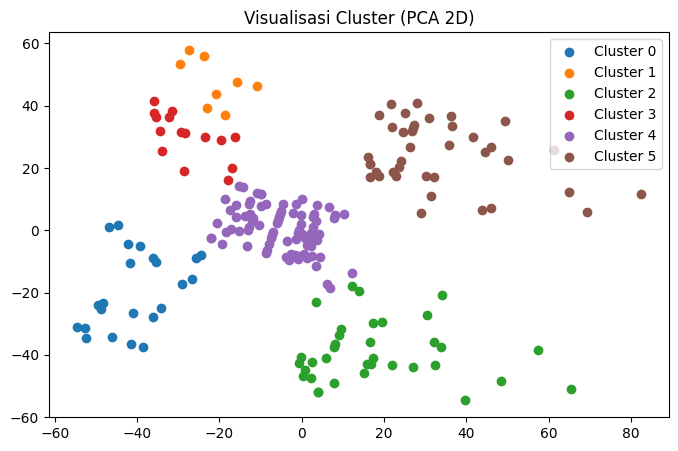

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)  # pastikan 'data' adalah NumPy array hasil normalisasi

# Plot hasil cluster
plt.figure(figsize=(8, 5))
for cluster in set(labels):
    plt.scatter(
        [data_2d[i][0] for i in range(len(data_2d)) if labels[i] == cluster],
        [data_2d[i][1] for i in range(len(data_2d)) if labels[i] == cluster],
        label=f"Cluster {cluster}"
    )

plt.title("Visualisasi Cluster (PCA 2D)")
plt.legend()
plt.show()


# **5. Eksperimen**

k = 2 | Silhouette Score = 0.3572


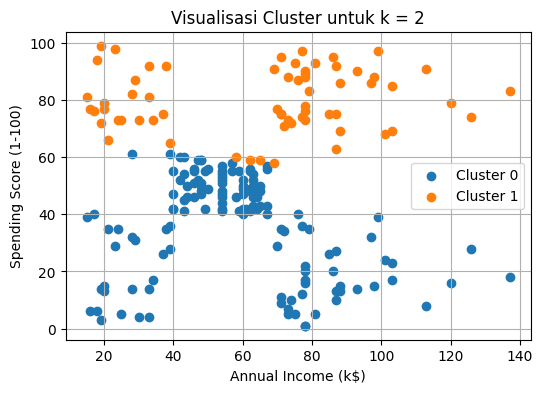

k = 3 | Silhouette Score = 0.4676


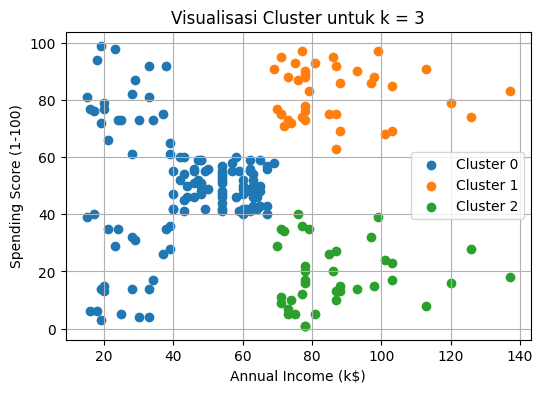

k = 4 | Silhouette Score = 0.4938


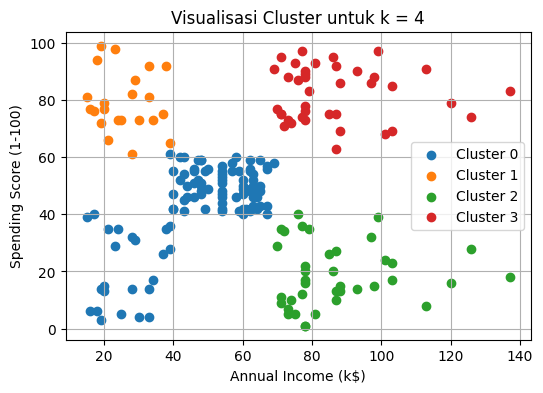

k = 5 | Silhouette Score = 0.5539


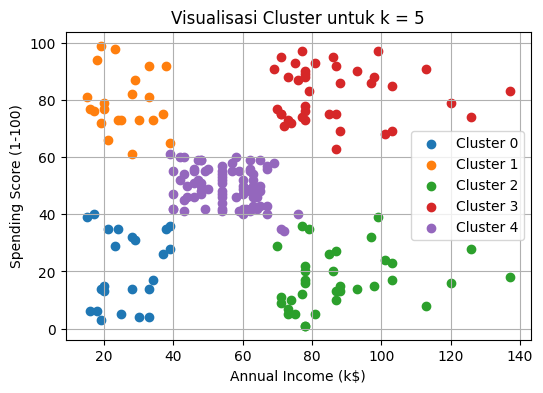

k = 6 | Silhouette Score = 0.5171


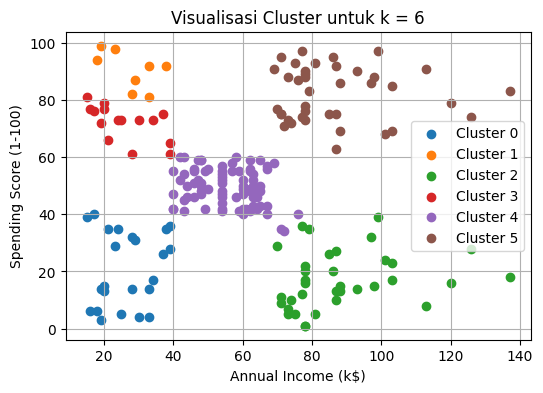

In [ ]:
# Data sudah dalam bentuk list of tuples: data_list

results = []

for k in range(2, 7):  # Coba k = 2 sampai k = 6
    labels, centroids = kmeans_manual(data_list, k)
    score = silhouette_score_manual(data_list, labels)
    results.append((k, score, labels))

    print(f"k = {k} | Silhouette Score = {round(score, 4)}")

    # Visualisasi cluster
    plt.figure(figsize=(6, 4))
    for cluster in set(labels):
        cluster_points = [data_list[i] for i in range(len(data_list)) if labels[i] == cluster]
        x, y = zip(*cluster_points)
        plt.scatter(x, y, label=f"Cluster {cluster}")
    plt.title(f"Visualisasi Cluster untuk k = {k}")
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.legend()
    plt.grid(True)
    plt.show()

# **6. Kesimpulan**

Berdasarkan hasil eksplorasi data, pemodelan, evaluasi, dan eksperimen clustering terhadap data pelanggan menggunakan algoritma K-Means tanpa bantuan library, diperoleh bahwa jumlah klaster (k) yang optimal adalah sebanyak 5 klaster, dengan nilai Silhouette Score sebesar 0.5539, yang merupakan skor tertinggi dibandingkan nilai k lainnya (k = 2 hingga k = 6). Hal ini menunjukkan bahwa pemisahan antar klaster pada k = 5 cukup jelas dan kompak, sehingga pembagian pelanggan ke dalam lima segmen dianggap paling representatif dalam menggambarkan pola pengeluaran dan tingkat pendapatan mereka. Dengan segmentasi ini, perusahaan dapat menyusun strategi pemasaran yang lebih terarah dan efektif sesuai dengan karakteristik masing-masing kelompok pelanggan.